In [13]:
import xarray as xr
import glob
import os

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cartopy.crs as ccrs

In [2]:
'''
This function opens the file and put them in a list (the file pattern given) 
of a list (every query of that file pattern).

file_pattern must be a list.
example: 

LIST file_pattern = ['b.e11.B1850C5CN.f09_g16.005.cam.h0.FLNT.*.nc', 
                'b.e11.B1850C5CN.f09_g16.005.cam.h0.FSNT.*.nc']
would open all of these files and output a list like this:
variables = ['['...FLNT.001.nc', '...FLNT.002.nc', '...FLNT.X.nc'], 
              ['...FSNT.001.nc', '...FSNT.002.nc', '...FSNT.X.nc']']
'''
def Set_Variables(file_pattern):
    variables = []
    for order in range(len(file_pattern)):
        temp_var = []
        file_paths = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_control/NetFlux/' + file_pattern[order])
        for file_path in file_paths:
            # Open the dataset
            ds = xr.open_dataset(file_path)
            temp_var.append(ds)
            ds.close()
        variables.append(temp_var)
    return variables

In [3]:
#Make a new file name. This only works for B1850C5CN name convention.
def NewFile(prefix, var, number):
    newname = []
    newname.append(f"{prefix}.{var}.{number}.nc")
    return newname[0]

In [4]:
models = ['b.e11.B1850C5CN.f09_g16.005.cam.h0', 'e.e11.E1850C5CN.f09_g16.001.cam.h0', 'f.e11.F1850C5CN.f09_f09.001.cam.h0']
factor = ['NetFluxT', 'NetFluxS']
# ==========
# compsets
# ==========

ddict = []
ds = []
for compset in range(len(models)):
    file_pattern = []
    for n in range(len(factor)):
        # factors = the variables used in Surface Fluxes.
        file_pattern.append(NewFile(models[compset], factor[n], "*"))
    ds = Set_Variables(file_pattern)
    ddict.append(ds)
print(len(ddict))

3


In [47]:
ddict

[[[<xarray.Dataset>
   Dimensions:   (ilev: 31, lat: 192, lev: 30, lon: 288, slat: 191, slon: 288,
                  time: 1200)
   Coordinates:
     * ilev      (ilev) float64 2.255 5.032 10.16 18.56 ... 947.4 967.5 985.1 1e+03
     * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
     * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
     * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
     * slat      (slat) float64 -89.53 -88.59 -87.64 -86.7 ... 87.64 88.59 89.53
     * slon      (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
     * time      (time) object 0400-02-01 00:00:00 ... 0500-01-01 00:00:00
   Data variables:
       NetFluxT  (time, lat, lon) float32 ...
   Attributes: (12/13)
       Conventions:               CF-1.0
       source:                    CAM
       case:                      b.e11.B1850C5CN.f09_g16.005
       title:                     UNSET
       logname:         

In [6]:
ds_temp = xr.concat(ddict[0][0], dim='time').mean(dim='time')
ds_temp

<xarray.Dataset>
Dimensions:   (ilev: 31, lat: 192, lev: 30, lon: 288, slat: 191, slon: 288)
Coordinates:
  * ilev      (ilev) float64 2.255 5.032 10.16 18.56 ... 947.4 967.5 985.1 1e+03
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * slat      (slat) float64 -89.53 -88.59 -87.64 -86.7 ... 87.64 88.59 89.53
  * slon      (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
Data variables:
    NetFluxT  (lat, lon) float32 183.2 184.5 184.6 184.6 ... 248.1 248.1 248.1

### Net Fluxes plot in lat/lon view

#### Individual graphs

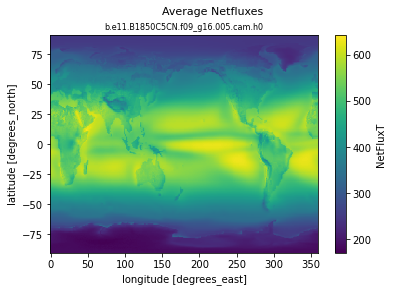

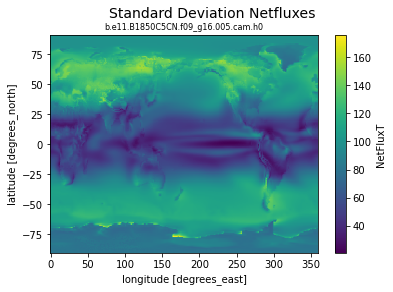

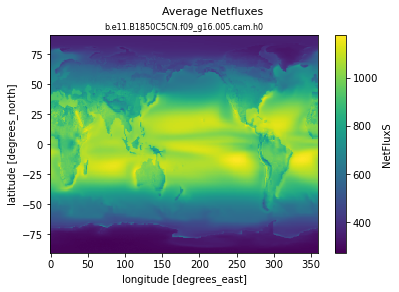

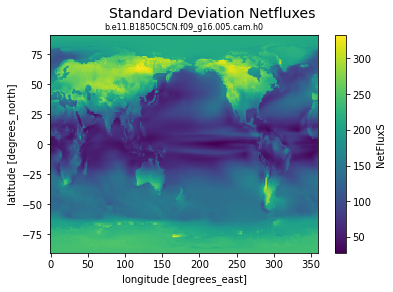

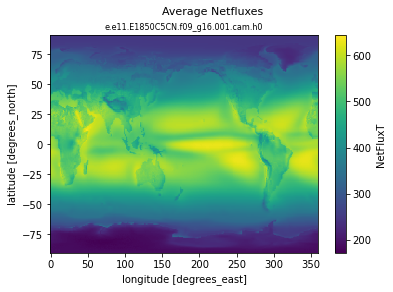

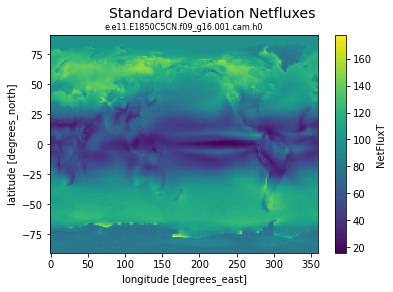

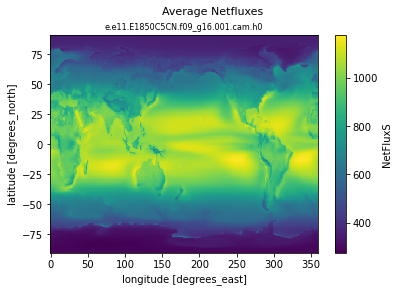

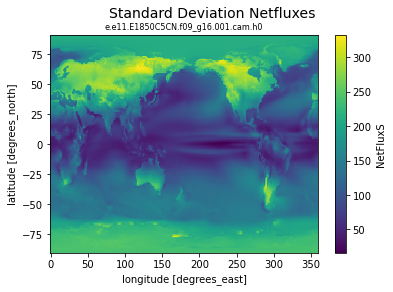

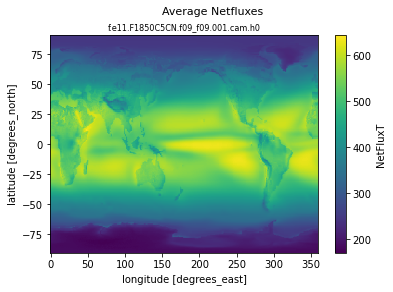

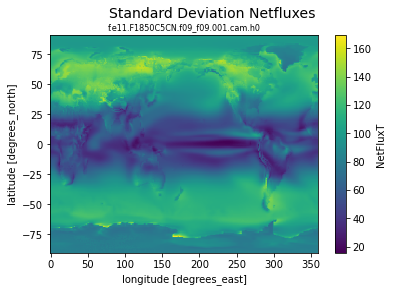

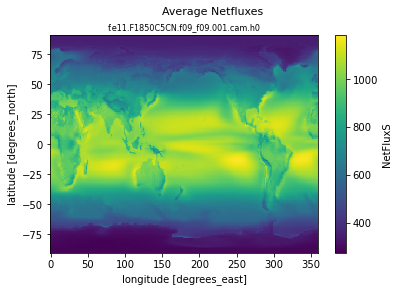

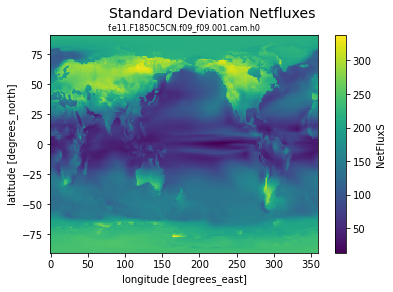

In [46]:
ds_average = []
ds_std = []

#With contours
fig = plt.figure(figsize=(35, 10))
gs = gridspec.GridSpec(4, 3, width_ratios=[2,1])
gs.update(wspace=0)
#top=300
#bottom=270
font = {'size'   : 20,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

for i in range(len(ddict)): #looping over each model
    for j in range(len(ddict[i])): #looping over each variable
        ds_var = xr.concat(ddict[i][j], dim='time').var(dim='time')
        ds_std = xr.concat(ddict[i][j], dim='time').std(dim='time')

        # Plotting Std
        #plt.figure()
        ax1 = fig.add_subplot(gs[i][j], projection=ccrs.PlateCarree(central_longitude=180))
        ds_std[factor[j]].plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='turbo',  
                               cbar_kwargs={'label':r'$\sigma$ [$W/m^2$]'})
        plt.suptitle("Standard Deviation", fontsize=14, ha='center')
        plt.title(models[i], fontsize=8, ha='center')
        #filename = f"Std_{j+1}_{models[i]}.png"
        #plt.savefig(filename)
        #plt.show()
        
        # Plotting Variance
        ax2 = fig.add_subplot(gs[i][j], projection=ccrs.PlateCarree(central_longitude=180))
        ds_var[factor[j]].plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='turbo',  
                               cbar_kwargs={'label':r'$\sigma$ [$W/m^2$]')
        plt.suptitle("Average Netfluxes", fontsize=11, ha='center')
        plt.title(models[i], fontsize=8, ha='center')
        #filename = f"Avg_{j+1}_{models[i]}.png"
        #plt.savefig(filename)
        #plt.show()


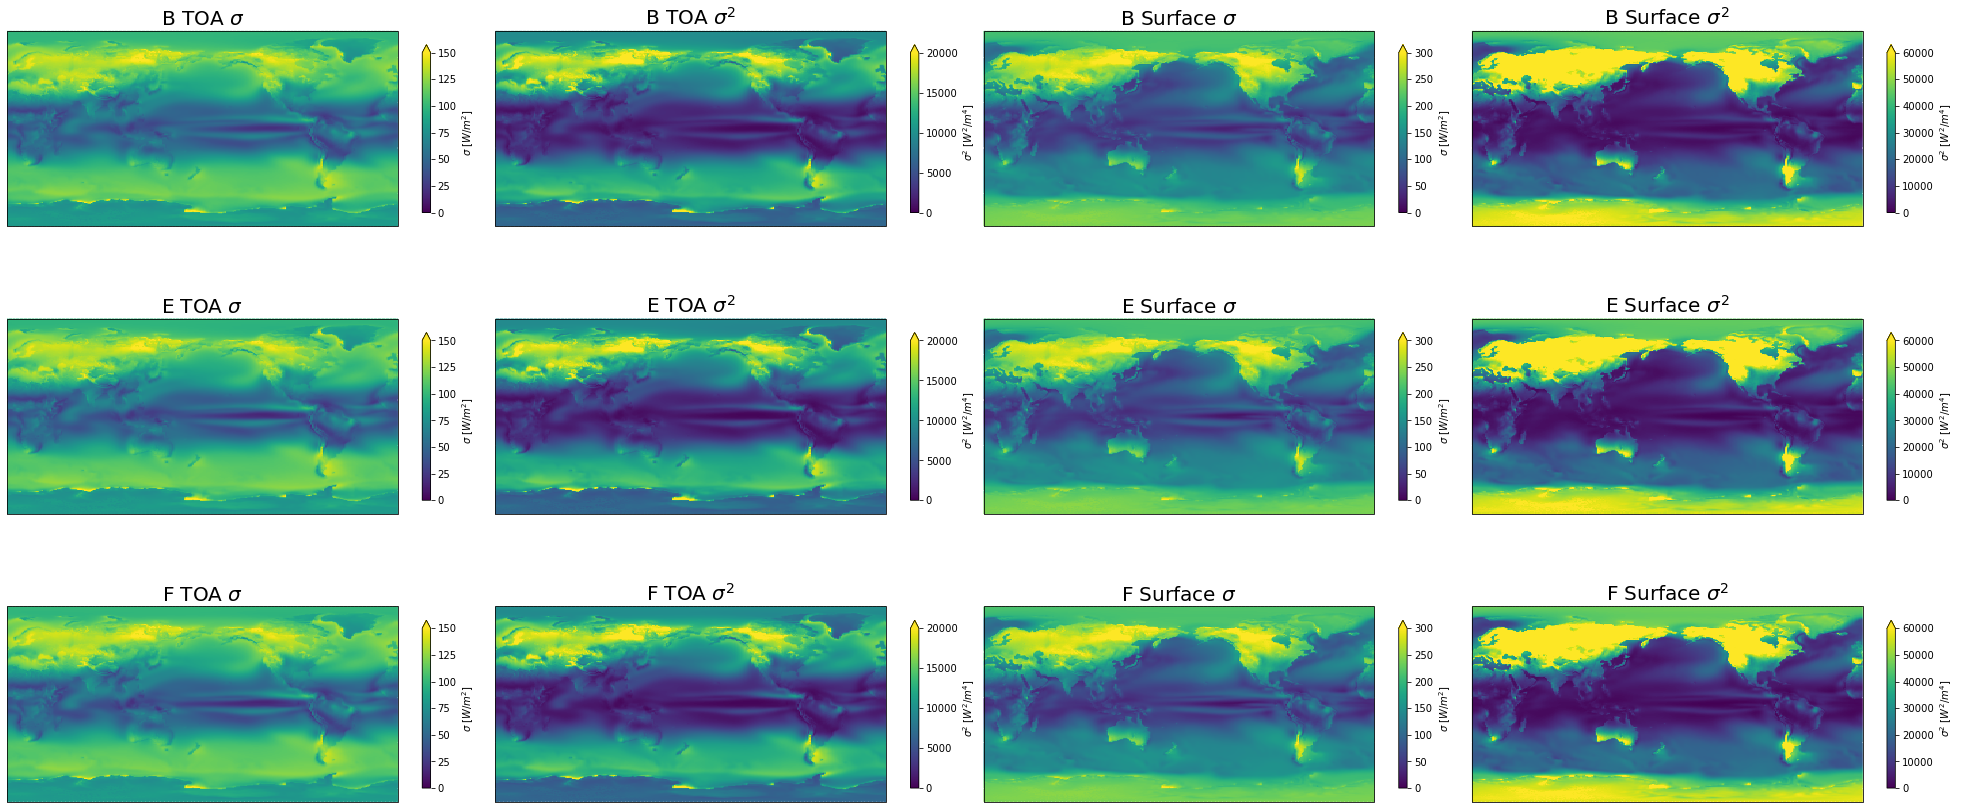

In [24]:
ds_average = []
ds_std = []

#With contours
fig = plt.figure(figsize=(35, 15))
gs = gridspec.GridSpec(3, 4)
gs.update(wspace=0)
#top=300
#bottom=270
font = {'size'   : 10,
        'weight' : 'normal'}

matplotlib.rc('font', **font)
k = 0

models_label = ['B', 'E', 'F']
factors_label = ['TOA', 'Surface']

for i in range(len(ddict)): #looping over each model
    for j in range(len(ddict[i])): #looping over each variable
        ds_var = xr.concat(ddict[i][j], dim='time').var(dim='time')
        ds_std = xr.concat(ddict[i][j], dim='time').std(dim='time')

        if j == 0:
            vmin_st = 0
            vmax_st = 150
            vmin_va = 0
            vmax_va = 20000
        if j == 1:
            vmin_st = 0
            vmax_st = 300
            vmin_va = 0
            vmax_va = 60000
            
        # Plotting Std
        #plt.figure()
        ax1 = fig.add_subplot(gs[k], projection=ccrs.PlateCarree(central_longitude=180))
        ds_std[factor[j]].plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=vmin_st, vmax=vmax_st,
                               cbar_kwargs={'label':r'$\sigma$ [$W/m^2$]',
                                            'shrink': 0.7})
        #plt.suptitle("Standard Deviation", fontsize=14, ha='center')
        plt.title(str(models_label[i]) + ' ' + str(factors_label[j]) + r' $\sigma$', fontsize=20, ha='center')
        #filename = f"Std_{j+1}_{models[i]}.png"
        #plt.savefig(filename)
        #plt.show()
        k += 1
        
        # Plotting Variance
        ax2 = fig.add_subplot(gs[k], projection=ccrs.PlateCarree(central_longitude=180))
        ds_var[factor[j]].plot(ax=ax2, transform=ccrs.PlateCarree(), vmin=vmin_va, vmax=vmax_va,
                               cbar_kwargs={'label':r'$\sigma^2$ [$W^2/m^4$]',
                                            'shrink': 0.7})
        #plt.title("Average Netfluxes", fontsize=11, ha='center')
        plt.title(str(models_label[i]) + ' ' + str(factors_label[j]) + r' $\sigma^2$', fontsize=20, ha='center')
        #filename = f"Avg_{j+1}_{models[i]}.png"
        #plt.savefig(filename)
        #plt.show()
        k += 1


In [5]:
ds_var_lis = []
ds_std_lis = []
for i in range(len(ddict)): #looping over each model
    for j in range(len(ddict[i])): #looping over each variable
        ds_var = xr.concat(ddict[i][j], dim='time').var(dim='time')
        ds_var_lis.append(ds_var)
        ds_std = xr.concat(ddict[i][j], dim='time').std(dim='time')
        ds_std_lis.append(ds_std)

#### Combimed Graphs

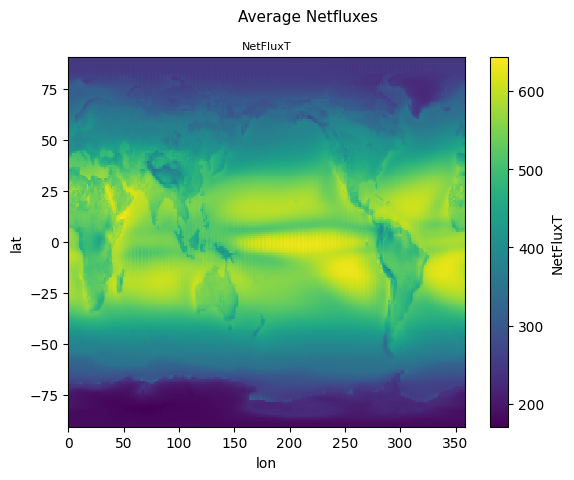

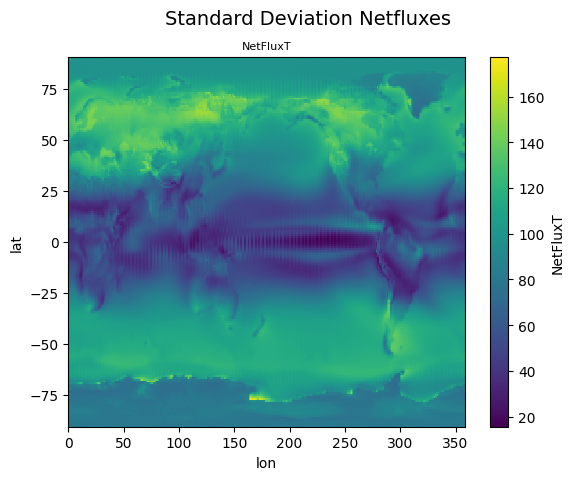

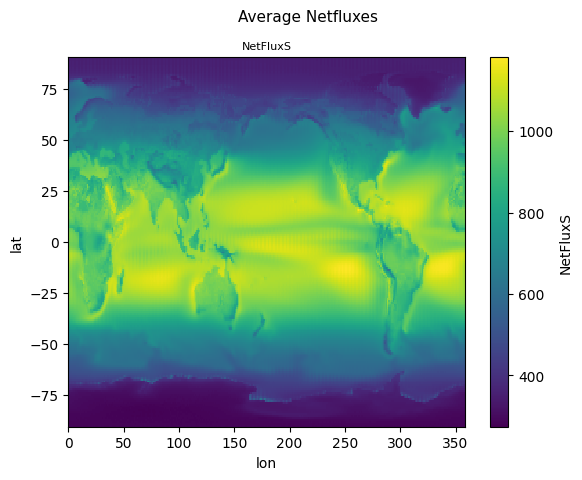

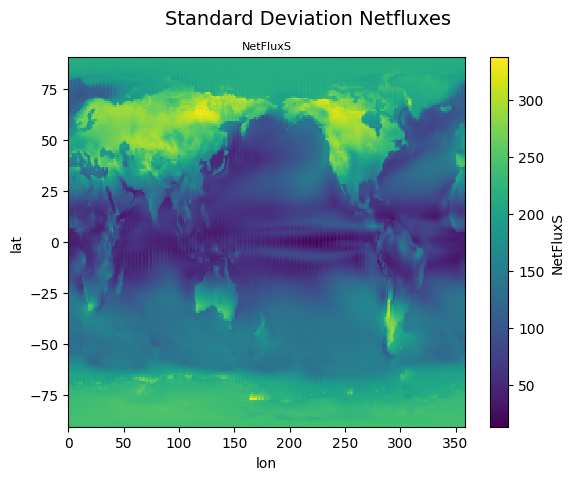

In [7]:
ds_average = []
ds_std = []
for i in range(len(factor)): # looping over each variable
    sds_avg = []
    sds_std = []
    for j in range(len(ddict)): #looping over each models, and add them to the dataset list
        ds_temp = xr.concat(ddict[j][i], dim='time').mean(dim='time')
        sds_avg.append(ds_temp)
        ds_temp = xr.concat(ddict[j][i], dim='time').std(dim='time')
        sds_std.append(ds_temp)

    # Combine the dataset list
    ds_average = xr.combine_nested([sds_avg], concat_dim=["lat", "lon"], join="outer")
    ds_std = xr.combine_nested([sds_std], concat_dim=["lat", "lon"], join="outer")
    
    # Plot Mean
    plt.figure()
    ds_average[factor[i]].sortby(["lat", "lon"]).plot()
    plt.suptitle("Average Netfluxes", fontsize=11, ha='center')
    plt.title(factor[i], fontsize=8, ha='center')
    filename = f"Avg_{factor[i]}.png"
    plt.savefig(filename)
    plt.show()
    plt.close()

    # Plot Std
    plt.figure()
    ds_std[factor[i]].sortby(["lat", "lon"]).plot()
    plt.suptitle("Standard Deviation Netfluxes", fontsize=14, ha='center')
    plt.title(factor[i], fontsize=8, ha='center')
    filename = f"Std_{factor[i]}.png"
    plt.savefig(filename)
    plt.show()
    plt.close()